# Priority Queues

## Agenda

1. Motives
2. Naive implementation
2. Heaps
    - Mechanics
    - Implementation
    - Run-time Analysis
3. Heapsort

## 1. Motives

## 2. Naive implementation

In [1]:
class PriorityQueue:
    def __init__(self, key):
        self.data = []
        self.key = key
        
    def add(self, x):
        if not self:
            self.data.append(x)
        else:
            for i in range(len(self.data)):
                if self.key[i] < self.key(x):
                    self.data.insert(i,x)
                    break
                else:
                    self.data.append(x)
            
#         if not self.data:
#             self.data.appen(x)
#         else:
#             mx = max(self.data)
#             if x > mx:
#                 self.data.insert(0.x)
#             else:
#                 self.data.appen(x)
                
    def max(self):
        assert(self)
        return self.data[0]

    def pop_max(self):
        assert(self)
        return self.data.pop[0]
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
pq = PriorityQueue(key = lambda x: x)

In [3]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

TypeError: 'function' object is not subscriptable

In [4]:
pq.data

[4]

In [5]:
while pq:
    print(pq.pop_max())

TypeError: 'builtin_function_or_method' object is not subscriptable

## 3. Heaps

### Mechanics

### Implementation

In [1]:
class Heap:
    def __init__(self):
        self.data = []
    @staticmethod
    def _left(idx):
        return idx * 2 + 1
    @staticmethod
    def _right(idx):
        return idx * 2 + 2
    @staticmethod
    def _parent(idx):
        return (idx-1) // 2
    
    def add(self, x):
        self.data.append(x)
        idx = len(self.data)-1
        par = Heap._parent(idx)
        while idx > 0 and self.data[par] < self.data[idx]:
            self.data[par], self.data[idx] = self.data[idx], self.data[par]
            idx, par = par, Heap._parent(par)
            
            
    
    def max(self):
        assert(self)
        return self.data[0]
    
    def _heapify(self, idx=0):
        l_idx = Heap._left(idx)
        r_idx = Heap._right(idx)
        
        while True:
            max_idx = idx
            if l_idx < len(self.data) and self.data[max_idx] < self.data [l_idx]:
                max_idx = l_idx
            if r_idx < len(self.data) and self.data[max_idx] < self.data [r_idx]:
                max_idx = r_idx
            if max_idx != idx:
                self.data[max_idx], self.data[idx] = self.data [idx], self.data[max_idx]
                idx, l_idx, r_idx = max_idx, Heap._left(max_idx), Heap._right(max_idx)
            else:
                break
                
                
                
                
    def pop_max(self):
        assert(self)
        ret = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        self._heapify(0)
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
h = Heap()

In [3]:
import random
for _ in range(10):
    h.add(random.randrange(100))

In [4]:
h

[95, 88, 50, 23, 65, 28, 29, 13, 0, 29]

In [5]:
while h:
    print(h.pop_max())

95
88
65
50
29
29
28
23
13
0


In [10]:
t = Heap()
data=[4,2, 9, 5, 3, 8]
for i in data:
    t.add(i)
t

[9, 5, 8, 2, 3, 4]

### Run-time Analysis

In [6]:
## 'add': O(log2N)
## 'max': O(1)
## 'pop_max': O(log2N)

## 4. Heapsort

In [48]:
def heapsort(iterable):   #O(N log N)
    heap = Heap()   #O(1)
    for x in iterable:  #loops N times => 0 (N log N)
        heap.add(x)    # each invocation takes log(N)
    l = []
    while heap:       #loops N times => 0 (N log N)
        l.append(heap.pop_max())      # each pop_max is O(log(N))
    l.reverse()  # O(N)
    return l

In [53]:
import random
to_sort = list(range(20))
random.shuffle(to_sort)
to_sort

[19, 6, 18, 12, 9, 7, 14, 0, 10, 2, 16, 15, 17, 13, 8, 5, 11, 4, 1, 3]

In [54]:
heapsort(to_sort)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [49]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

/Users/chenrs/Documents/CS401/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: generator 'pairs' raised StopIteration


True

In [55]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

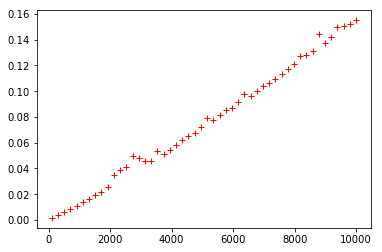

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

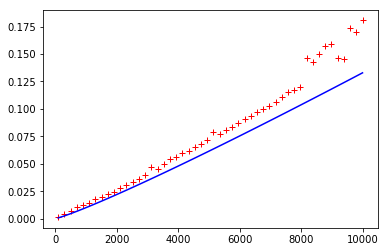

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()